# Sección 1: Análisis Exploratorio de los datos

In [1]:
import numpy as np
import os
from tensorflow import keras
from keras.models import load_model, clone_model
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0, Xception
from tensorflow_addons.metrics import F1Score

In [2]:
# Set workspace
%cd /content/Data/

/content/Data


In [3]:
def LoadImages (foldname):
  '''
  Returns array of images in the folder name provided in the format
  X_train, y_train, X_test, y_test, X_valid, y_valid
  '''
  X_train = []
  y_train = []
  X_test = []
  y_test = []
  X_valid = []
  y_valid = []
  
  # Train data
  for i in os.listdir(str(foldname+'/train/normal')):
    X_train.append(image.imread(str(foldname+'/train/normal/'+i)))
    y_train.append(0)
  for i in os.listdir(str(foldname+'/train/abnormal')):
    X_train.append(image.imread(str(foldname+'/train/abnormal/'+i)))
    y_train.append(1)

    # Test data
  for i in os.listdir(str(foldname+'/test/normal')):
    X_test.append(image.imread(str(foldname+'/test/normal/'+i)))
    y_test.append(0)
  for i in os.listdir(str(foldname+'/test/abnormal')):
    X_test.append(image.imread(str(foldname+'/test/abnormal/'+i)))
    y_test.append(1)

    # Validation data
  for i in os.listdir(str(foldname+'/valid/normal')):
    X_valid.append(image.imread(str(foldname+'/valid/normal/'+i)))
    y_valid.append(0)
  for i in os.listdir(str(foldname+'/valid/abnormal')):
    X_valid.append(image.imread(str(foldname+'/valid/abnormal/'+i)))
    y_valid.append(1)
  
  return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), np.array(X_valid), np.array(y_valid)

In [4]:
# Load images from Fold0
X_train_0, y_train_0, X_test_0, y_test_0, X_valid_0, y_valid_0 = LoadImages('Fold0')

In [5]:
def print_data_info(X_train, y_train, X_test, y_test, X_valid, y_valid):
  '''
  Prints shapes for train, test and valid arrays
  '''
  # Train data
  print("ENTRENAMIENTO\t", X_train.shape,
        "\nNº de imágenes:\t", X_train.shape[0],
        "\nTamaño:\t\t", X_train.shape[1], "x", X_train.shape[2], "píxeles",
        "\nColores:\t", X_train.shape[3],
        "\nNº de casos:\t", y_train.shape[0], '(\033[3mNormal\033[0m + \033[3mAbnormal\033[0m)',
        "\n- \033[3mNormal\033[0m:\t", sum(y_train==0),
        str('(\033[1m'+str(round((sum(y_train==0)/y_train.shape[0])*100, 1))+'%\033[0m)'),
        "\n- \033[3mAbnormal\033[0m:\t", sum(y_train==1),
        str('(\033[1m'+str(round((sum(y_train==1)/y_train.shape[0])*100, 1))+'%\033[0m)'))
  
  # Test data
  print("\n\nTEST\t\t", X_test.shape,
        "\nNº de imágenes:\t", X_test.shape[0],
        "\nTamaño:\t\t", X_test.shape[1], "x", X_test.shape[2], "píxeles",
        "\nColores:\t", X_test.shape[3],
        "\nNº de casos:\t", y_test.shape[0], '(\033[3mNormal\033[0m + \033[3mAbnormal\033[0m)',
        "\n- \033[3mNormal\033[0m:\t", sum(y_test==0),
        str('(\033[1m'+str(round((sum(y_test==0)/y_test.shape[0])*100, 1))+'%\033[0m)'),
        "\n- \033[3mAbnormal\033[0m:\t", sum(y_test==1),
        str('(\033[1m'+str(round((sum(y_test==1)/y_test.shape[0])*100, 1))+'%\033[0m)'))
  
  # Validation data
  print("\n\nVALIDACIÓN\t", X_valid.shape,
        "\nNº de imágenes:\t", X_valid.shape[0],
        "\nTamaño:\t\t", X_valid.shape[1], "x", X_valid.shape[2], "píxeles",
        "\nColores:\t", X_valid.shape[3],
        "\nNº de casos:\t", y_valid.shape[0], '(\033[3mNormal\033[0m + \033[3mAbnormal\033[0m)',
        "\n- \033[3mNormal\033[0m:\t", sum(y_valid==0),
        str('(\033[1m'+str(round((sum(y_valid==0)/y_valid.shape[0])*100, 1))+'%\033[0m)'),
        "\n- \033[3mAbnormal\033[0m:\t", sum(y_valid==1),
        str('(\033[1m'+str(round((sum(y_valid==1)/y_valid.shape[0])*100, 1))+'%\033[0m)'))


In [6]:
print_data_info(X_train_0, y_train_0, X_test_0, y_test_0, X_valid_0, y_valid_0)

ENTRENAMIENTO	 (1379, 224, 224, 3) 
Nº de imágenes:	 1379 
Tamaño:		 224 x 224 píxeles 
Colores:	 3 
Nº de casos:	 1379 (Normal + Abnormal) 
- Normal:	 754 (54.7%) 
- Abnormal:	 625 (45.3%)


TEST		 (174, 224, 224, 3) 
Nº de imágenes:	 174 
Tamaño:		 224 x 224 píxeles 
Colores:	 3 
Nº de casos:	 174 (Normal + Abnormal) 
- Normal:	 82 (47.1%) 
- Abnormal:	 92 (52.9%)


VALIDACIÓN	 (154, 224, 224, 3) 
Nº de imágenes:	 154 
Tamaño:		 224 x 224 píxeles 
Colores:	 3 
Nº de casos:	 154 (Normal + Abnormal) 
- Normal:	 83 (53.9%) 
- Abnormal:	 71 (46.1%)


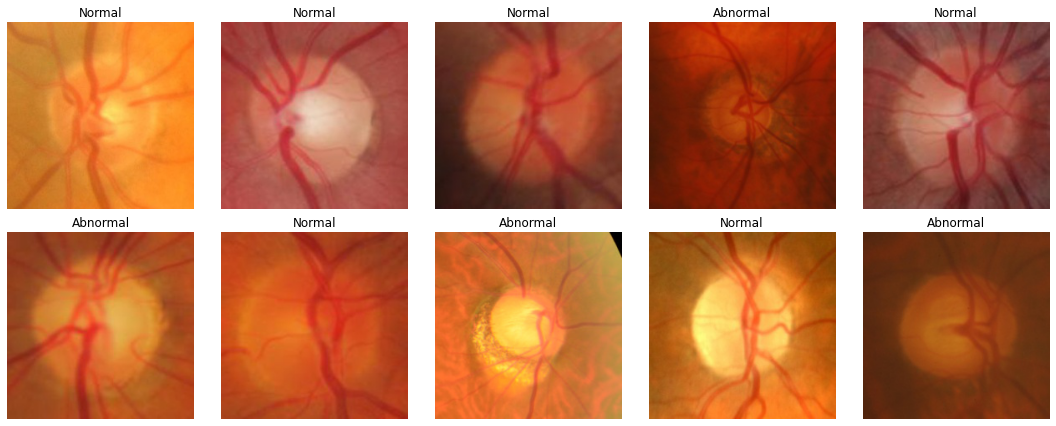

In [7]:
# Plot 10 random images in train array
fig, axis = plt.subplots(2, 5, figsize=(15, 6))
j = 0
r = np.random.choice(range(X_train_0.shape[0]), 10, replace=False)
for i, ax in enumerate(axis):
    for a in ax:
        a.imshow(X_train_0[r[j]])
        a.set_title('Normal' if y_train_0[r[j]] == 0 else 'Abnormal')
        a.axis('off')
        j=j+1
plt.tight_layout()

# Sección 2. Entrenamiento de una red neuronal sobre una única partición

## Modelo 1

In [8]:
# Set model input
input = layers.Input(shape=(X_train_0.shape[1], X_train_0.shape[2], X_train_0.shape[3]))

# Load EfficientNetB0 with ImageNet weights
m = EfficientNetB0(include_top=False, input_tensor=input, weights='imagenet')

# Freeze model
m.trainable = False

# Add layers
x = m(input, training=False)
x = layers.GlobalAveragePooling2D(name='NEW_GAP2D')(m.output)
x = layers.BatchNormalization(name='NEW_BN')(x)
x = layers.Dropout(.2, name='NEW_DO')(x)
output = layers.Dense(1, activation='sigmoid', name='NEW_D')(x)

# Assemble model
m1 = tf.keras.Model(input, output, name='EfficientNet_Model_1')

# Set optimizer
op = Adam(learning_rate=.0001)

# Set threshold to decide wheter a probability is considered as positive or negative result
threshold = .5

# Load F1Score
f1 = F1Score(num_classes=1, threshold=threshold)

# Compile
m1.compile(optimizer=op, loss='binary_crossentropy', metrics=[f1])
m1.summary(show_trainable=True)

Model: "EfficientNet_Model_1"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               N          
                                )]                                                                           
                                                                                                             
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                N          
                                                                                                             
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              N          
                                                                                          

In [9]:
# Set parameters
epochs = 60
bs = 32

# Set callbacks to save only the best model (based on F1-Score on validation data) whithin the training
callbacks = [EarlyStopping(monitor='val_f1_score',
                           mode='max',
                           patience=10),
             ModelCheckpoint(filepath='model1.h5',
                             monitor='val_f1_score',
                             mode='max',
                             save_best_only=True,
                             save_weights_only=True)]

# Train model
m1_h = m1.fit(X_train_0, y_train_0,
              epochs=epochs,
              batch_size=bs,
              callbacks=callbacks,
              validation_data=(X_valid_0, y_valid_0),
              verbose=0)

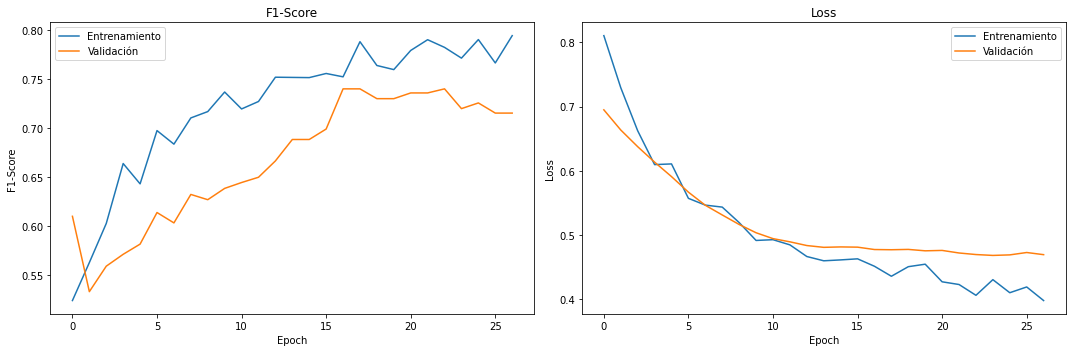

In [10]:
# Plot F1-Score and Loss
def plot_hist(mfit):
  '''
  Receives a fitted model and plots F1-Score and Loss functions
  '''
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

  ax[0].plot(mfit.history['f1_score'])
  ax[0].plot(mfit.history['val_f1_score'])
  ax[0].set_title('F1-Score')
  ax[0].set_ylabel('F1-Score')
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['Entrenamiento', 'Validación'], loc='upper left')
  
  ax[1].plot(mfit.history['loss'])
  ax[1].plot(mfit.history['val_loss'])
  ax[1].set_title('Loss')
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['Entrenamiento', 'Validación'], loc='upper right')
    
  plt.tight_layout()

plot_hist(m1_h)

Con threshold = 0.5 , el F1-Score es 0.767 



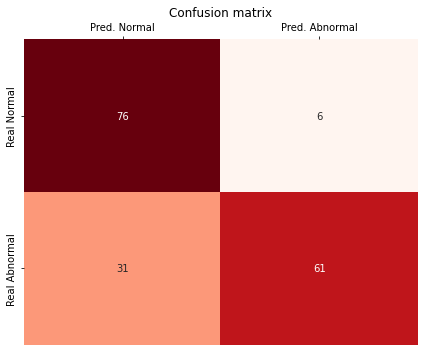

In [11]:
# Load best weights
m1.load_weights('model1.h5')

# Predict test data
y_pred_0 = m1.predict(X_test_0)

# Create binary prediction array
y_pred_0 = np.asarray([0 if i < threshold else 1 for i in y_pred_0])

# Define function to get F1-Score and plot confusion matrix
def get_f1_plot_cm(y_test, y_pred, get_f1=True, plot_title='Confusion matrix'):
  '''
  Returns F1-Score and plots confusion matrix given real and prediction data
  '''
  # Create and plot Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (6,5))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Reds')
  ax.set_yticklabels(['Real Normal', 'Real Abnormal'])
  ax.set_xticklabels(['Pred. Normal', 'Pred. Abnormal'], )
  ax.set_title(plot_title)
  ax.tick_params(labeltop=True, top=True, labelbottom=False, bottom=False)

  plt.tight_layout()

  # Get and print F1-Score
  if get_f1:
    m_f1 = f1_score(y_test, y_pred)
    print('Con threshold =', threshold, ', el F1-Score es', round(m_f1, 3), '\n')

    return m_f1
  else: return None

# Get and print F1-Score and confusion matrix
m1_f1 = get_f1_plot_cm(y_test_0, y_pred_0)

## Modelo 2

In [12]:
# Clone previous model
m2 = clone_model(m1)

# Load weights
m2.load_weights('model1.h5')

# Set name
m2._name = 'EfficientNet_Model_2'

# Unfreeze last 20 layers except BatchNormalization ones
ls = m2.layers
for l in ls[-21:-1]:
  if l.__class__.__name__ != 'BatchNormalization':
    l.trainable=True

# Set optimizer with a lower learning rate due to the need for precision in fine tuning
op = Adam(learning_rate=.00001)

# Compile model
m2.compile(optimizer=op, loss='binary_crossentropy', metrics=[f1])
m2.summary(show_trainable=True)

Model: "EfficientNet_Model_2"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               Y          
                                )]                                                                           
                                                                                                             
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                N          
                                                                                                             
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              N          
                                                                                          

In [13]:
# Set callbacks to save only the best model (based on F1-Score on validation data) whithin the training
callbacks = [EarlyStopping(monitor='val_f1_score',
                           mode='max',
                           patience=10),
             ModelCheckpoint(filepath='model2.h5',
                             monitor='val_f1_score',
                             mode='max',
                             save_best_only=True,
                             save_weights_only=True)]

# Train model
m2_h = m2.fit(X_train_0, y_train_0,
              epochs=epochs,
              batch_size=bs,
              callbacks=callbacks,
              validation_data=(X_valid_0, y_valid_0),
              verbose=0)

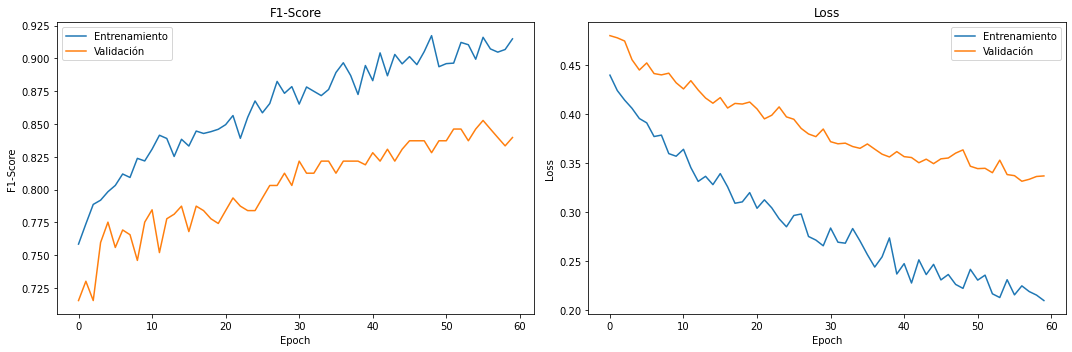

In [14]:
# Plot F1-Score and Loss
plot_hist(m2_h)

Con threshold = 0.5 , el F1-Score es 0.882 



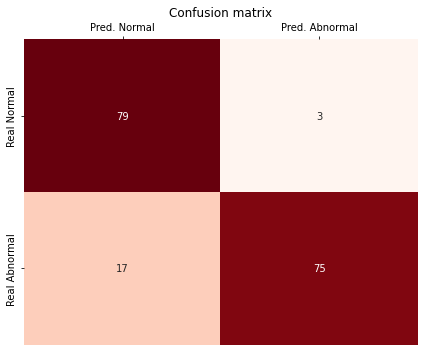

In [15]:
# Load best weights
m2.load_weights('model2.h5')

# Predict test data
y_pred_0 = m2.predict(X_test_0)

# Create binary prediction array with same threshold used earlier (.5)
y_pred_0 = np.asarray([0 if i < threshold else 1 for i in y_pred_0])

# Get and print F1-Score and confusion matrix
m2_f1 = get_f1_plot_cm(y_test_0, y_pred_0)

## Modelo 3

In [16]:
# Clone previous model
m3 = clone_model(m2)

# Load weights
m3.load_weights('model2.h5')

# Set name
m3._name = 'EfficientNet_Model_3'

# Unfreeze
for i, l in enumerate(m3.layers):
  if l.__class__.__name__ != 'BatchNormalization':
    l.trainable = True

# Compile model with a lower learning_rate due to the need for precision in fine-tuning
m3.compile(optimizer=op, loss='binary_crossentropy', metrics=[f1])
m3.summary(show_trainable=True)

Model: "EfficientNet_Model_3"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               Y          
                                )]                                                                           
                                                                                                             
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                Y          
                                                                                                             
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              Y          
                                                                                          

In [17]:
# Set callbacks to save only the best model (based on F1-Score on validation data) whithin the training
callbacks = [EarlyStopping(monitor='val_f1_score',
                           mode='max',
                           patience=10),
             ModelCheckpoint(filepath='model3.h5',
                             monitor='val_f1_score',
                             mode='max',
                             save_best_only=True, 
                             save_weights_only=True)]

# Train model
m3_h = m3.fit(X_train_0, y_train_0,
              epochs=epochs,
              batch_size=bs,
              callbacks=callbacks,
              validation_data=(X_valid_0, y_valid_0),
              verbose=0)

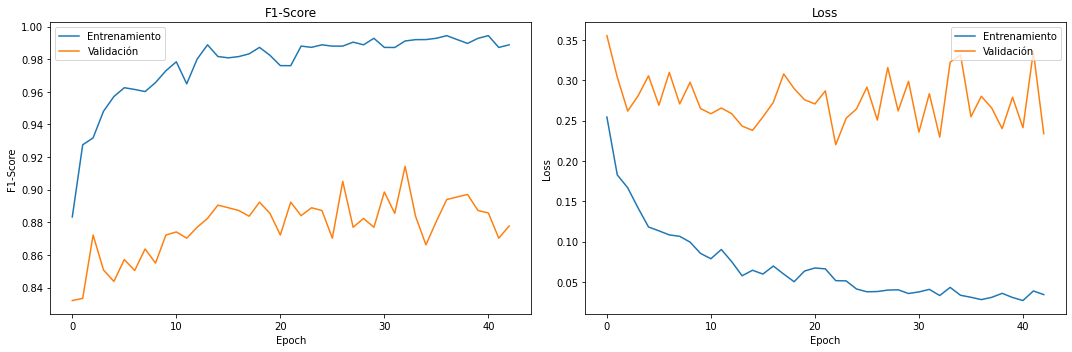

In [18]:
# Plot F1-Score and Loss
plot_hist(m3_h)

Con threshold = 0.5 , el F1-Score es 0.903 



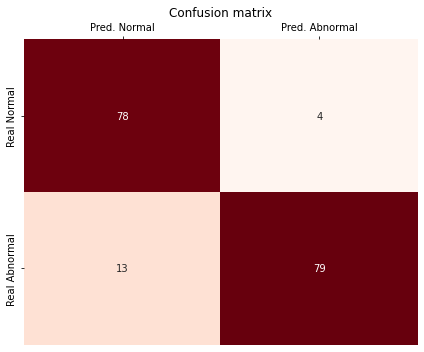

In [19]:
# Load best weights
m3.load_weights('model3.h5')

# Predict test data
y_pred_0 = m3.predict(X_test_0)

# Create binary prediction array with same threshold used earlier (.5)
y_pred_0 = np.asarray([0 if i < threshold else 1 for i in y_pred_0])

# Get and print F1-Score and confusion matrix
m3_f1 = get_f1_plot_cm(y_test_0, y_pred_0)

## Modelo 4

In [20]:
# Load Xception with ImageNet weights
m = Xception(include_top=False, input_tensor=input, weights='imagenet', input_shape=X_train_0.shape[1:4])

# Freeze model
m.trainable = False

# Assemble model adding the same layers that the previous ones
m4 = tf.keras.Model(input, output, name='Xception_Model_4')

# Set optimizer with a higher learning rate
op = Adam(learning_rate=.0001)

# Compile
m4.compile(optimizer=op, loss='binary_crossentropy', metrics=[f1])
m4.summary(show_trainable=True)

Model: "Xception_Model_4"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               N          
                                )]                                                                           
                                                                                                             
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                N          
                                                                                                             
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              N          
                                                                                              

In [21]:
# Set callbacks to save only the best model (based on F1-Score on validation data) whithin the training
callbacks = [EarlyStopping(monitor='val_f1_score',
                           mode='max',
                           patience=10),
             ModelCheckpoint(filepath='model4.h5',
                             monitor='val_f1_score',
                             mode='max',
                             save_best_only=True,
                             save_weights_only=True)]

# Train model
m4_h = m4.fit(X_train_0, y_train_0,
              epochs=epochs,
              batch_size=bs,
              callbacks=callbacks,
              validation_data=(X_valid_0, y_valid_0),
              verbose=0)

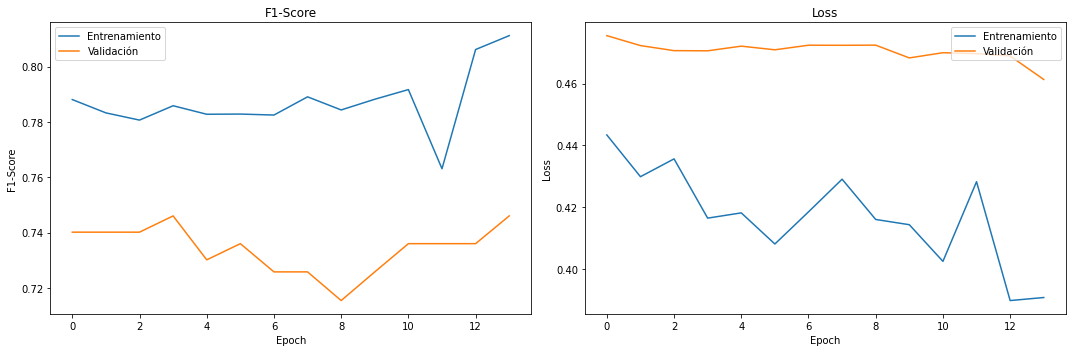

In [22]:
# Plot F1-Score and Loss
plot_hist(m4_h)

Con threshold = 0.5 , el F1-Score es 0.772 



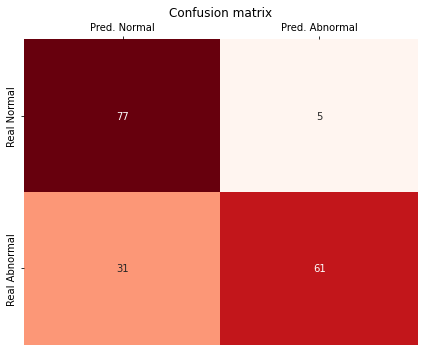

In [23]:
# Load best weights
m4.load_weights('model4.h5')

# Predict test data
y_pred_0 = m4.predict(X_test_0)

# Create binary prediction array with same threshold used earlier (.5)
y_pred_0 = np.asarray([0 if i < threshold else 1 for i in y_pred_0])

# Get and print F1-Score and confusion matrix
m4_f1 = get_f1_plot_cm(y_test_0, y_pred_0)

## Modelo 5

In [24]:
# Clone previous model
m5 = clone_model(m4)

# Load weights
m5.load_weights('model4.h5')

# Set name
m5._name = 'Xception_Model_5'

# Unfreeze
ls = m5.layers
for l in ls:
  if l.__class__.__name__ != 'BatchNormalization':
    l.trainable=True

# Set optimizer with a lower learning rate due to the need for precision in fine tuning
op = Adam(learning_rate=.00001)

# Compile model
m5.compile(optimizer=op, loss='binary_crossentropy', metrics=[f1])
m5.summary(show_trainable=True)

Model: "Xception_Model_5"
_____________________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     Trainable  
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               Y          
                                )]                                                                           
                                                                                                             
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                Y          
                                                                                                             
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              Y          
                                                                                              

In [25]:
# Set callbacks to save only the best model (based on F1-Score on validation data) whithin the training
callbacks = [EarlyStopping(monitor='val_f1_score',
                           mode='max',
                           patience=10),
             ModelCheckpoint(filepath='model5.h5',
                             monitor='val_f1_score',
                             mode='max',
                             save_best_only=True,
                             save_weights_only=True)]

# Train model
m5_h = m5.fit(X_train_0, y_train_0,
              epochs=epochs,
              batch_size=bs,
              callbacks=callbacks,
              validation_data=(X_valid_0, y_valid_0),
              verbose=0)

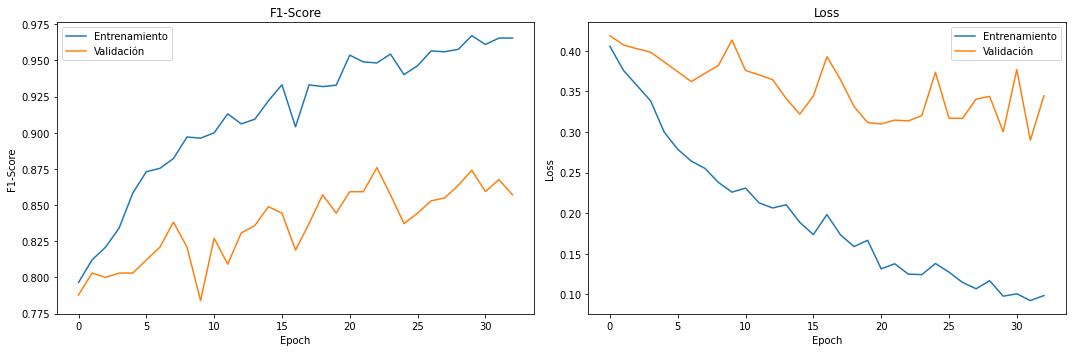

In [26]:
# Plot F1-Score and Loss
plot_hist(m5_h)

Con threshold = 0.5 , el F1-Score es 0.877 



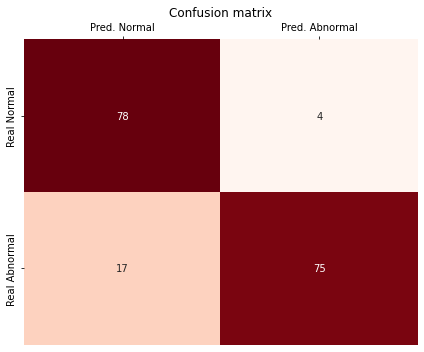

In [27]:
# Load best weights
m5.load_weights('model5.h5')

# Predict test data
y_pred_0 = m5.predict(X_test_0)

# Create binary prediction array with same threshold used earlier (.5)
y_pred_0 = np.asarray([0 if i < threshold else 1 for i in y_pred_0])

# Get and print F1-Score and confusion matrix
m5_f1 = get_f1_plot_cm(y_test_0, y_pred_0)

# Sección 3. Validación cruzada y discusión 

## Mejor modelo de los 5 anteriores

In [28]:
# Print F1-Scores
print('F1-SCORES')
m_f1 = [m1_f1, m2_f1, m3_f1, m4_f1, m5_f1]
for i,j in enumerate(m_f1):
  print('Modelo', i+1, '->', round(j,3))

# Get best model
best = m_f1.index([max(m_f1)])+1
print('\nEl mejor modelo es el Modelo', best)
models = [m1, m2, m3, m4, m5]
bm = clone_model(models[best-1])

# Load weights and compile
bm.load_weights('model'+str(best)+'.h5')
bm.compile(optimizer=op, loss='binary_crossentropy', metrics=[f1])

F1-SCORES
Modelo 1 -> 0.767
Modelo 2 -> 0.882
Modelo 3 -> 0.903
Modelo 4 -> 0.772
Modelo 5 -> 0.877

El mejor modelo es el Modelo 3


## Cross-Validation

In [29]:
n_folds = 10
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

# Load data
for i in range(n_folds):
  print('Fold' + str(i) + '...', end=' ')
  X_train_tmp, y_train_tmp, X_test_tmp, y_test_tmp, X_valid_tmp, y_valid_tmp = LoadImages('Fold'+str(i))
  X_train.append(X_train_tmp)
  y_train.append(y_train_tmp)
  X_test.append(X_test_tmp)
  y_test.append(y_test_tmp)
  X_valid.append(X_valid_tmp)
  y_valid.append(y_valid_tmp)
  print('loaded.')

Fold0... loaded.
Fold1... loaded.
Fold2... loaded.
Fold3... loaded.
Fold4... loaded.
Fold5... loaded.
Fold6... loaded.
Fold7... loaded.
Fold8... loaded.
Fold9... loaded.


In [30]:
bm_h = []     # List for models' history
y_pred = []   # List for models' predictions
bm_f1 = []    # List for models' F1-Score

for i in range(n_folds):
  print('FOLD'+str(i)+':\tTraining...', end=' ')
  # Set callbacks to save only the best model (based on F1-Score on validation data) whithin the training
  callbacks = [EarlyStopping(monitor='val_f1_score',
                             mode='max',
                             patience=10),
               ModelCheckpoint(filepath='bestmodel'+str(i)+'.h5',
                               monitor='val_f1_score',
                               mode='max',
                               save_best_only=True,
                               save_weights_only=True)]
  
  # Train model
  bm_h = bm.fit(X_train[i], y_train[i],
                epochs=epochs,
                batch_size=bs,
                callbacks=callbacks,
                validation_data=(X_valid[i], y_valid[i]),
                verbose=0)
  print('done.\n\tPredicting...', end=' ')
  
  # Predict
  y_pred.append(bm.predict(X_test[i]))
  # Create binary prediction array with same threshold used earlier (.5)
  y_pred[i] = np.asarray([0 if j < threshold else 1 for j in y_pred[i]])
  print('done.\n\tCalculating F1...', end=' ')

  # Get F1-Score
  bm_f1.append(f1_score(y_test[i], y_pred[i]))
  print('done.\n')

  # Return to initial weights
  bm.load_weights('model'+str(best)+'.h5')

FOLD0:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD1:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD2:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD3:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD4:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD5:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD6:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD7:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD8:	Training... done.
	Predicting... done.
	Calculating F1... done.

FOLD9:	Training... done.
	Predicting... done.
	Calculating F1... done.



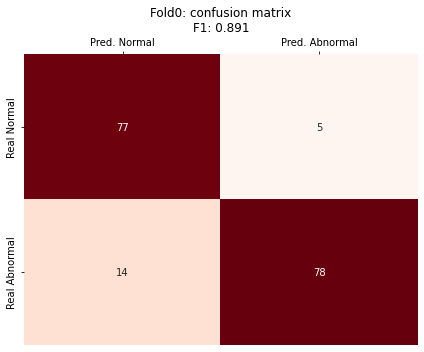

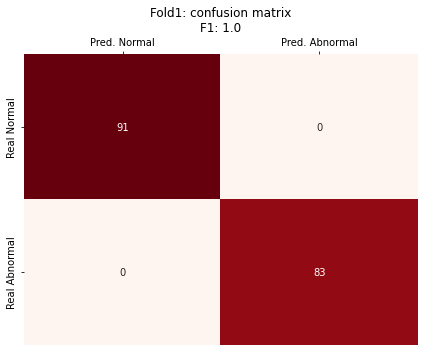

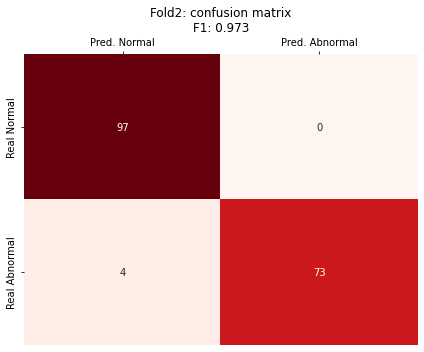

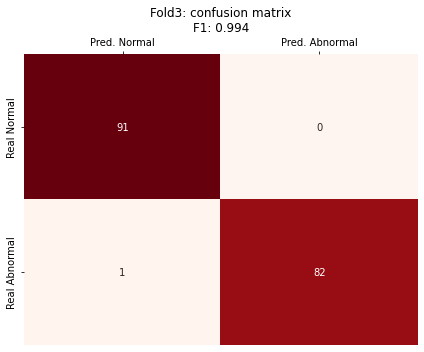

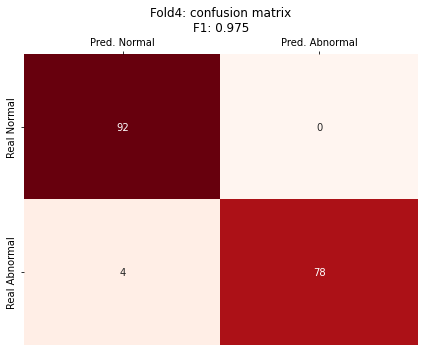

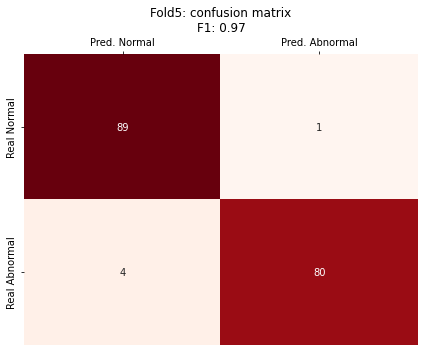

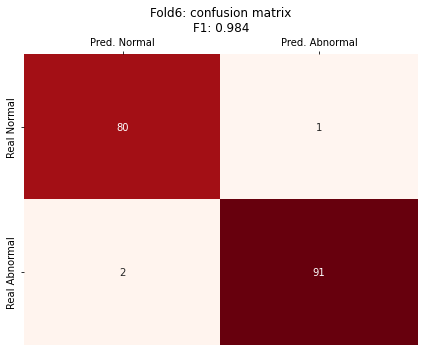

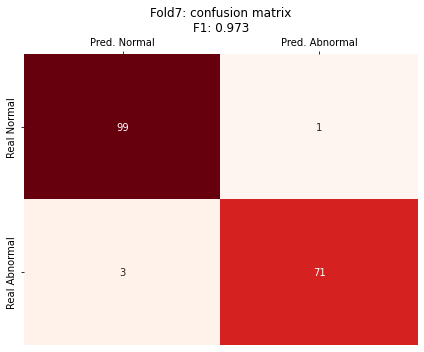

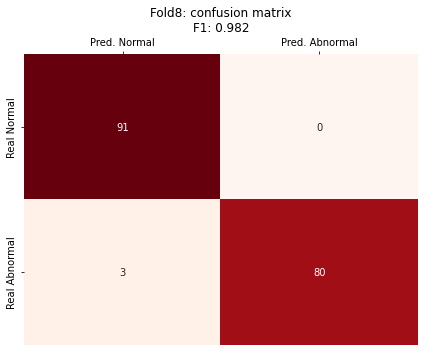

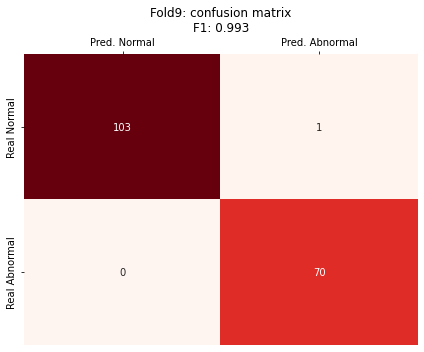

In [31]:
for i in range(len(y_pred)):
  get_f1_plot_cm(y_test[i], y_pred[i], get_f1=False, plot_title='Fold'+str(i)+': confusion matrix\nF1: '+str(round(bm_f1[i],3)))

In [32]:
print('F1-SCORES')
for i in range(len(bm_f1)):
  print('Fold'+str(i)+' -> '+str(round(bm_f1[i],4)))

print('\nValor medio ->', round(np.average(bm_f1),4))
print('Desviación estándar ->', round(np.std(bm_f1),4))

F1-SCORES
Fold0 -> 0.8914
Fold1 -> 1.0
Fold2 -> 0.9733
Fold3 -> 0.9939
Fold4 -> 0.975
Fold5 -> 0.9697
Fold6 -> 0.9838
Fold7 -> 0.9726
Fold8 -> 0.9816
Fold9 -> 0.9929

Valor medio -> 0.9734
Desviación estándar -> 0.029


## Minimizar falsos negativos

In [33]:
# Get False Negatives given actual values and predictions
def get_fn(y_t, y_p):
  '''
  Returns False Negatives given two arrays: real values and predicted values
  '''
  cm = confusion_matrix(y_t, y_p)
  return cm[1][0]

# To minimize False Negatives, we can play with the threshold to adjust the predictions
def set_threshold_minimize_fn(y_test, y_pred, thresholds=[.35, .375, .4, .425, .45, .475, .5, .525, .55, .575, .6, .625, .65, .675]):
  '''
  Model output are float numbers from 0 to 1. This function sets the optimal threshold
  to decide positive and negative results minimizing the later. Thresholds can be set
  '''
  fn = []
  for i in thresholds:
    y_p = np.asarray([0 if j < i else 1 for j in y_pred])
    fn.append(get_fn(y_test, y_p))
  t = thresholds[fn.index(min(fn))]
  return t

In [34]:
def print_fn(model, X_true, y_true, threshold):
  '''
  Prints threshold, FN and F1-Score given a model, X_true values, y_true values
  and threshold
  '''
  y_pred = model.predict(X_true)
  y_p = np.asarray([0 if j < threshold else 1 for j in y_pred])
  f1 = f1_score(y_true, y_p)
  print('Threshold ->', threshold,
        '\nFalsos Negativos ->', get_fn(y_true, y_p),
        '\nF1-Score ->', f1)

# Set example model to use
model_number = 5

# Using default threshold (.5)
print('Antes de minimizar falsos negativos:')
bm.load_weights('bestmodel'+str(model_number)+'.h5')
t = .5
print_fn(bm, X_test[model_number], y_test[model_number], t)

# Uisng optimized threshold
print('\nDespués de minimizar falsos negativos:')
y_p = bm.predict(X_test[model_number])
t = set_threshold_minimize_fn(y_test[model_number], y_p)
print_fn(bm, X_test[model_number], y_test[model_number], t)

Antes de minimizar falsos negativos:
Threshold -> 0.5 
Falsos Negativos -> 4 
F1-Score -> 0.9696969696969696

Después de minimizar falsos negativos:
Threshold -> 0.35 
Falsos Negativos -> 3 
F1-Score -> 0.9759036144578312
